# =============================
# CIFAR-10 Image Classification
## ============================

In [2]:
# 1. Imports & Environment Check
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print("TensorFlow:", tf.__version__)
print("Using GPU?", tf.config.list_physical_devices('GPU'))  # Should be empty on CPU

TensorFlow: 2.19.0
Using GPU? []


In [3]:
# 2. Load & Preprocess Data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

print("Training data:", x_train.shape, "Testing data:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data: (50000, 32, 32, 3) Testing data: (10000, 32, 32, 3)


/tmp/ipython-input-1135811214.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


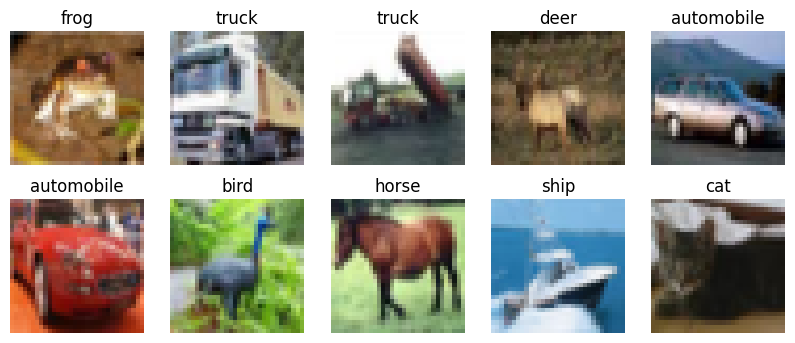

In [4]:
# 3. Visualize Sample Images
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

In [5]:
# 4. Build CNN Model (CPU Friendly)
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:

# 5. Train the Model on CPU
history = model.fit(
    x_train, y_train,
    epochs=15,            # Increase to 8–10 if time allows
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2
)

Epoch 1/15
782/782 - 75s - 96ms/step - accuracy: 0.4339 - loss: 1.5575 - val_accuracy: 0.5302 - val_loss: 1.3193
Epoch 2/15
782/782 - 70s - 89ms/step - accuracy: 0.5697 - loss: 1.2108 - val_accuracy: 0.5981 - val_loss: 1.1227
Epoch 3/15
782/782 - 83s - 106ms/step - accuracy: 0.6308 - loss: 1.0581 - val_accuracy: 0.6156 - val_loss: 1.0977
Epoch 4/15
782/782 - 82s - 104ms/step - accuracy: 0.6643 - loss: 0.9576 - val_accuracy: 0.6553 - val_loss: 0.9841
Epoch 5/15
782/782 - 82s - 104ms/step - accuracy: 0.6928 - loss: 0.8799 - val_accuracy: 0.6817 - val_loss: 0.9159
Epoch 6/15
782/782 - 81s - 104ms/step - accuracy: 0.7105 - loss: 0.8282 - val_accuracy: 0.6920 - val_loss: 0.8883
Epoch 7/15
782/782 - 83s - 106ms/step - accuracy: 0.7274 - loss: 0.7740 - val_accuracy: 0.6824 - val_loss: 0.9013
Epoch 8/15
782/782 - 83s - 107ms/step - accuracy: 0.7423 - loss: 0.7378 - val_accuracy: 0.6917 - val_loss: 0.8994
Epoch 9/15
782/782 - 78s - 100ms/step - accuracy: 0.7572 - loss: 0.6905 - val_accuracy: 0.

In [7]:
# 6. Evaluate Model Performance
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

313/313 - 4s - 11ms/step - accuracy: 0.7108 - loss: 0.9197
Test Accuracy: 0.71


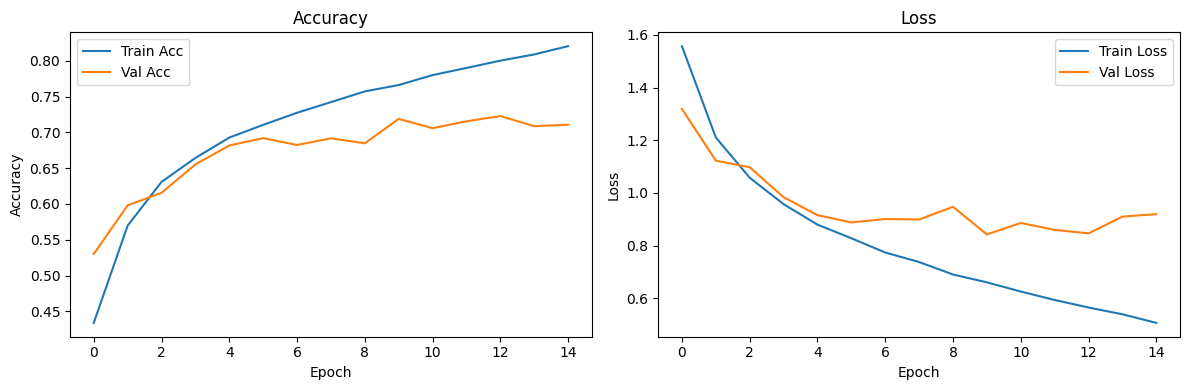

In [8]:
# 7. Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


/tmp/ipython-input-1157985263.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"P:{class_names[pred_labels[i]]}\nT:{class_names[int(y_test[i])]}")


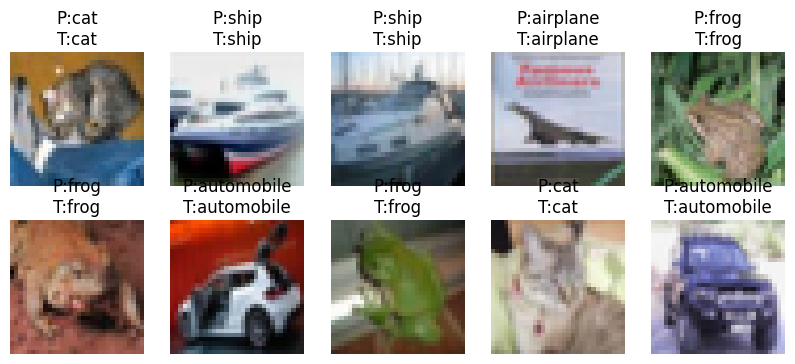

In [9]:
# 8. Make Predictions on Test Images
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

# Display some sample predictions
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"P:{class_names[pred_labels[i]]}\nT:{class_names[int(y_test[i])]}")
    plt.axis('off')
plt.show()

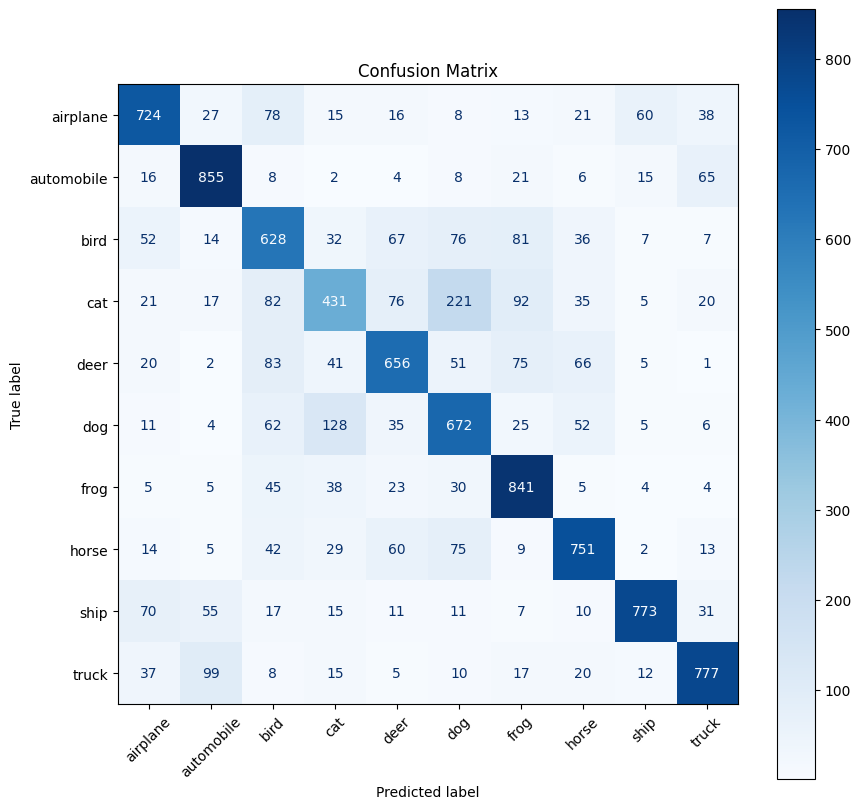

In [10]:
# 9. Confusion Matrix for Deeper Insight
cm = confusion_matrix(y_test, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [11]:
# 10. Save Model
model.save('cifar10_cnn_cpu_model.h5')
print("Model saved as cifar10_cnn_cpu_model.h5")

Model saved as cifar10_cnn_cpu_model.h5
